## Project Summary

We study the spam classification using decision tree and support vector machine. We tested our results on a publically available dataset and we reported the accuracy and the confusion matrices of both classifiers. Our metric for a successfull classsife is "low false positive rate" (false positive means the classifer sees the email as spam whereas the email is legit). Our analysis indicates that false positive in the decision on the our data gives us 0.07 where false postive rate on SVM is 0.15. Hence we recomend utilizing decision tree in the final production. While our analysis here is limited in terms of the number of classifiers and the size of the dataset, decision tree classifeir perform well and can potentially be utilized in applications.


In [1]:
import pandas as pd

#### Data Description :
In the classification problem I used a spam database available at the UCI Machine Learning repository : 

https://archive.ics.uci.edu/ml/datasets/spambase

The data consists of $57$ numerical attributes. The features can be divided into 3 categories : $(1)$ the frequency of specific keywords in an email sample, $(2)$ the frequency of certain characters, and $(3)$ the average run length of a string of capitals. The number of instances this data set is $4601$. Each instance is labeled as either spam ($1$) or legitimate ($0$).


Here we are loading the data using panda command :read_csv 


In [2]:
data = pd.read_csv('C:/data/spambase.data', sep=",", header=None)



We now show where and how we got the above numbers.

In [3]:
# lets take a look at the data first to get a feeling of it :
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# we now inspect the shape of this dataset :
data.shape

(4601, 58)

As can be seen here the data consists of 4601 rows and 58 columns. The columns are numbered from 0 to 57. The columns 0
to 56 are the features that represent the numerical properties of the email. Whereas the last column represent the label of the email.
According the documentation of the this dataset (1) represent a spam email and (0) represents a legit email.

## Data Prepration for the sci-kit learn library

In [5]:
# extracting the labels from the dataset:
labels = data[data.columns[-1]]
# converting the labels Dataframe to numpy array. We use the scikit learn convention and we will use the notation Y for this data.
Y=labels.to_numpy()

print(labels.head())

print("the shape of the label dataset :")
print(labels.shape)

0    1
1    1
2    1
3    1
4    1
Name: 57, dtype: int64
the shape of the label dataset :
(4601,)


In [6]:
# extracting the features from the dataset:
features = data[data.columns[:-1]]

# converting the features Dataframe to numpy array. We use the scikit learn convention and we will use the notation X for this data.
X=features.to_numpy()

print(features.head())
print("------------------------------------------")
print("The shape of the features dataset :")
print(X.shape)

     0     1     2    3     4     5     6     7     8     9   ...   47    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.0  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.0  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.0  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.0  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.0  0.00   

      49   50     51     52     53     54   55    56  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191  

[5 rows x 57 columns]
------------------------------------------
The shape of the features dataset :
(4601, 57)


### Splitting the data into training and testing datasets
we now split the data into testing and training datasets. We choose the ratio 60 for training and 40 for testing.


In [7]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = \
        train_test_split(X, Y, test_size=.4, random_state=42)

print("training data X shape ", X_train.shape)
print("test data X shape ", X_test.shape)

print("training data Y shape ", y_train.shape)
print("test data Y shape ", y_test.shape)

training data X shape  (2760, 57)
test data X shape  (1841, 57)
training data Y shape  (2760,)
test data Y shape  (1841,)


In [8]:
# I will start by doing some initial analysis on this data with a decision tree classifier.


from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [9]:
y_pred=clf.predict(X_test)

In [10]:
# we now inspect the confusion matrix for spam and legit emails:

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

[[0.9164371  0.0835629 ]
 [0.10239362 0.89760638]]


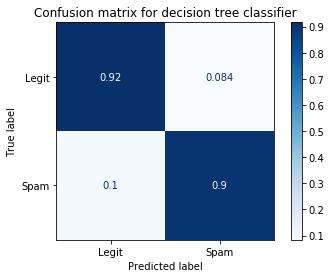

In [11]:

disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["Legit","Spam"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")
disp.ax_.set_title("Confusion matrix for decision tree classifier")


print(disp.confusion_matrix)

plt.show()

In [12]:
#y_test_predict = dsp.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [13]:
#from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.908745247148289

We now inspect the classification report for the classifier we trained.
 I used the wikipedia page to help me with the definitions of precision and recall :
https://en.wikipedia.org/wiki/Precision_and_recall

In [14]:
from sklearn.metrics import classification_report
target_names = ['Legit', 'Spam']
print("Decision tree classification report")
print(classification_report(y_test, y_pred, target_names=target_names))

Decision tree classification report
              precision    recall  f1-score   support

       Legit       0.93      0.92      0.92      1089
        Spam       0.88      0.90      0.89       752

    accuracy                           0.91      1841
   macro avg       0.90      0.91      0.91      1841
weighted avg       0.91      0.91      0.91      1841



We ranked the features in the decision tree using the document avaiable at : 
    https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Feature ranking:
1. feature 52 (0.338272)
2. feature 6 (0.163540)
3. feature 51 (0.086229)
4. feature 24 (0.056104)
5. feature 54 (0.052486)
6. feature 15 (0.032559)
7. feature 55 (0.028597)
8. feature 18 (0.026229)
9. feature 4 (0.021211)
10. feature 26 (0.019916)
11. feature 56 (0.019772)
12. feature 45 (0.013942)
13. feature 20 (0.013209)
14. feature 49 (0.011393)
15. feature 34 (0.009410)
16. feature 11 (0.006888)
17. feature 25 (0.006704)
18. feature 44 (0.006373)
19. feature 16 (0.006233)
20. feature 35 (0.005822)
21. feature 38 (0.005786)
22. feature 10 (0.004960)
23. feature 8 (0.004863)
24. feature 17 (0.004517)
25. feature 27 (0.004512)
26. feature 9 (0.004470)
27. feature 2 (0.004395)
28. feature 22 (0.004287)
29. feature 47 (0.004242)
30. feature 3 (0.003906)
31. feature 7 (0.003817)
32. feature 0 (0.002944)
33. feature 5 (0.002497)
34. feature 29 (0.001992)
35. feature 23 (0.001980)
36. feature 21 (0.001970)
37. feature 36 (0.001848)
38. feature 43 (0.001529)
39. feature 4

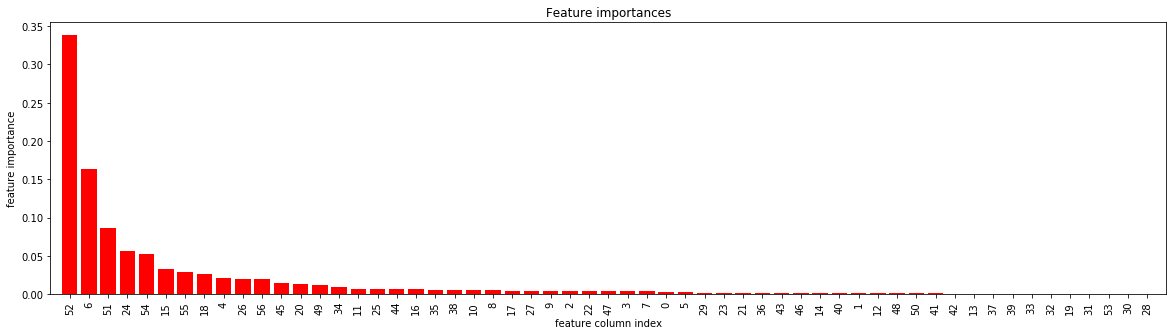

In [15]:
import numpy as np
import matplotlib.pyplot as plt

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices,rotation=90)
plt.xlabel('feature column index')
plt.ylabel('feature importance')
plt.xlim([-1, X.shape[1]])

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 25
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.show()

we see from the above figure that the features 52, 6 and 51 are the most important features in classifications. 
The importances of these feature are :
        
1. feature 52 (0.336858)
2. feature 6 (0.162518)
3. feature 51 (0.086059)

# Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

### Fit and Predict the model

In [17]:
gnb.fit(X_train, y_train)
gnb_y_pred= gnb.predict(X_test)

### Classification report

In [33]:
print("Gaussian Naive Bayes classification report")

print(classification_report(y_test, gnb_y_pred, target_names=["Legit","Spam"] ))

Gaussian Naive Bayes classification report
              precision    recall  f1-score   support

       Legit       0.96      0.72      0.82      1089
        Spam       0.70      0.95      0.81       752

    accuracy                           0.82      1841
   macro avg       0.83      0.84      0.82      1841
weighted avg       0.85      0.82      0.82      1841



[[0.72176309 0.27823691]
 [0.04521277 0.95478723]]


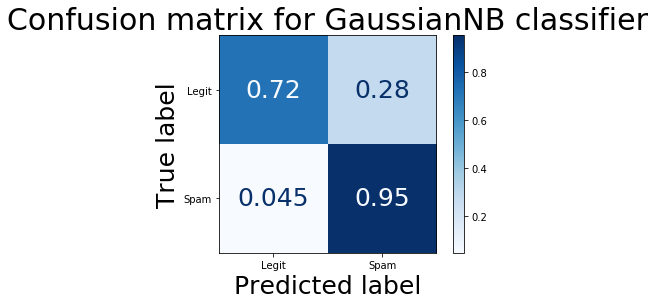

In [19]:

disp = plot_confusion_matrix(gnb, X_test, y_test,
                                 display_labels=["Legit","Spam"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")
disp.ax_.set_title("Confusion matrix for GaussianNB classifier")

print(disp.confusion_matrix)

plt.show()

# k-nearest neighbor

In [20]:
from sklearn.neighbors import KNeighborsClassifier
neigh_model = KNeighborsClassifier(n_neighbors=3)


In [21]:
neigh_model=KNeighborsClassifier()
neigh_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
gnb_y_predy=neigh_model.predict(X_test)

In [32]:
print("KNN classification report")

print(classification_report(y_test, gnb_y_predy, target_names=["Legit","Spam"] ))

KNN classification report
              precision    recall  f1-score   support

       Legit       0.79      0.83      0.81      1089
        Spam       0.74      0.69      0.71       752

    accuracy                           0.77      1841
   macro avg       0.77      0.76      0.76      1841
weighted avg       0.77      0.77      0.77      1841



[[0.83195592 0.16804408]
 [0.31117021 0.68882979]]


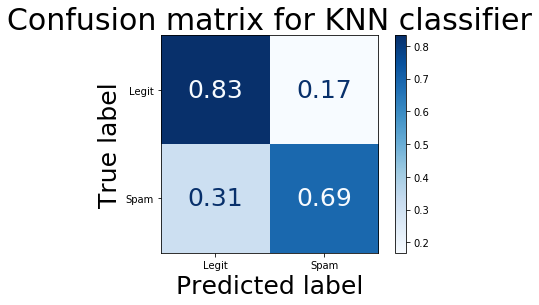

In [25]:
disp = plot_confusion_matrix(neigh_model, X_test, y_test,
                                 display_labels=["Legit","Spam"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")
disp.ax_.set_title("Confusion matrix for KNN classifier")

print(disp.confusion_matrix)

plt.show()

## Support vector machine model for spam classification

We now do the support vector machine (SVM) study on our data and see if we can get a better result than the decision tree that we had
earlier.

In [26]:
# load the model :
from sklearn.svm import SVC

clf_svm = SVC(C=1000.0, class_weight='balanced', gamma=0.005)
clf_svm = clf_svm.fit(X_train, y_train)


We now fit the SVM model :

In [27]:
y_pred=clf_svm.predict(X_test)

Now we plot the results and inspect which model performs better :

[[0.85491276 0.14508724]
 [0.15957447 0.84042553]]


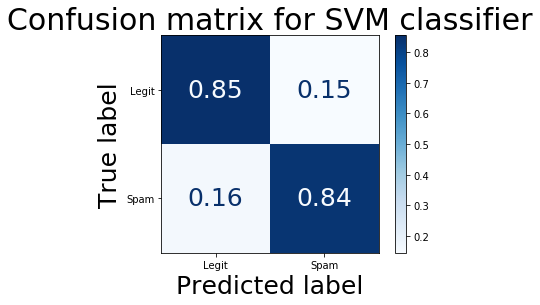

In [28]:

disp = plot_confusion_matrix(clf_svm, X_test, y_test,
                                 display_labels=["Legit","Spam"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")
disp.ax_.set_title("Confusion matrix for SVM classifier")

print(disp.confusion_matrix)

plt.show()

In [31]:
from sklearn.metrics import classification_report
target_names = ['Legit', 'Spam']
print("SVM classification report")
print(classification_report(y_test, y_pred, target_names=target_names))

SVM classification report
              precision    recall  f1-score   support

       Legit       0.89      0.85      0.87      1089
        Spam       0.80      0.84      0.82       752

    accuracy                           0.85      1841
   macro avg       0.84      0.85      0.84      1841
weighted avg       0.85      0.85      0.85      1841



#### Machine Learning Conclusion 
From the confusion matrices of the decision tree and the SVM we see that the decision tree has better results for and less false positive and false negative detection of spam emails.

#### A brief summary of the finding 


 
We study the spam classification using decision tree and support vector machine. We tested our results on a publically available dataset and we reported the accuracy and the confusion matrices of both classifiers.
Our metric for a successfull classsife is "low false
positive rate" (false positive means the classifer sees the email as spam whereas the email is legit). Our analysis indicates that false positive in the decision on the our data gives us 0.07 where false postive rate on SVM is 0.15.
Hence we recomend utilizing decision tree in the final production. While our analysis here is limited in terms of the number of classifiers and the size of the dataset, decision tree classifeir perform 
well and can potentially be utilized in applications. 

### Managerial insights: answer the "so what?" question.
##### Convince the reader that your findings can be used to improve operations and increase profit. Points are awarded based on clarity, brevity, and how actionable your findings are.

According to Dataprot(1) email spam costs businesses $20.5 billion every year.
That is a serious problem - if we keep that in mind while we analyze our models, we will definitely go with the decision tree classifier as it has "low false positive rate".In other words, its True positive and True negative are higher or closer to 1 compared to other classifers.Therefore, it is relaiable model where its accurancy is high in preventing data breaching.

In addition to saving us fortunes of money from potential data breach, using this classifier will protect our personal, customers, and business partners data. It will also cause business interruptions can cost us losing time and money and there is a big chance that our customers/business partners will not trust doing business with us anymore. 

If our data is compromised we will not only lose comapny's tangible and untangible assets. We could cost our customers and business partners fortunes as they have to deal with all that comes with their stolen data(identity theft is a major problem).
I attached a link(2) to more information /statistics on this issue to go over with the upper managers. 

(1)https://dataprot.net/statistics/spam-statistics/

(2)https://securityboulevard.com/2020/12/staggering-phishing-statistics-in-2020/#:~:text=The%20Shocking%20Phishing%20Statistics%20of%202020&text=Only%203%25%20of%20the%20users,the%20malicious%20link%20or%20attachment.
    